# Import libraries

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score



# Data Loading

In [2]:
csv_file_path = '/home/souvik/Documents/Code/Python/Machine-Learning-Lab/Clustering/CC GENERAL.csv'  # e.g., 'C:/Users/YourName/data.csv'
df = pd.read_csv(csv_file_path)

# Print column names
print("Available columns in the CSV:", df.columns.tolist())

# Extract numerical features
X = df.select_dtypes(include=['float64', 'int64']).values

# Set number of clusters (adjust as needed, e.g., based on elbow method or domain knowledge)
n_clusters = 7  # Example: set to 3 clusters; modify as needed

# Create DataFrame for visualization
df_vis = df.select_dtypes(include=['float64', 'int64'])

Available columns in the CSV: ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


# Data visualization 

In [3]:
# Fill NaN values in X with column means
import numpy as np

X_filled = np.where(np.isnan(X), np.nanmean(X, axis=0), X)



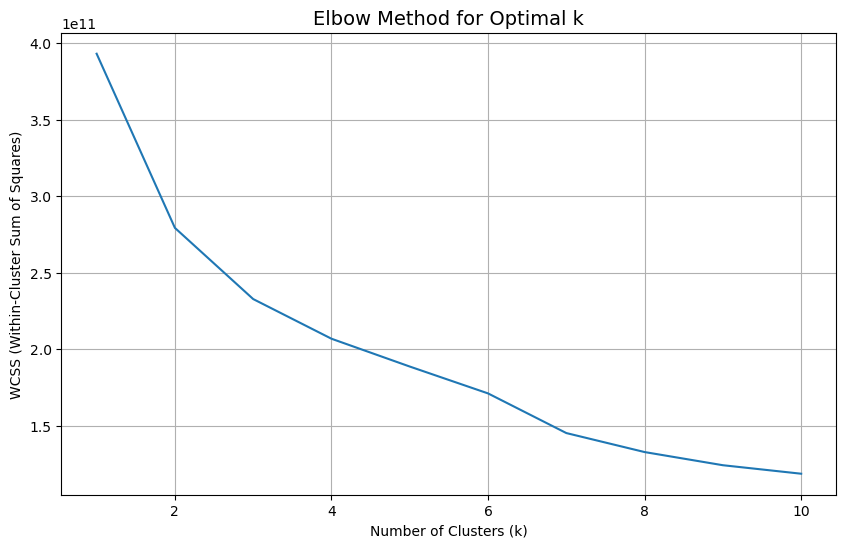

In [12]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_filled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

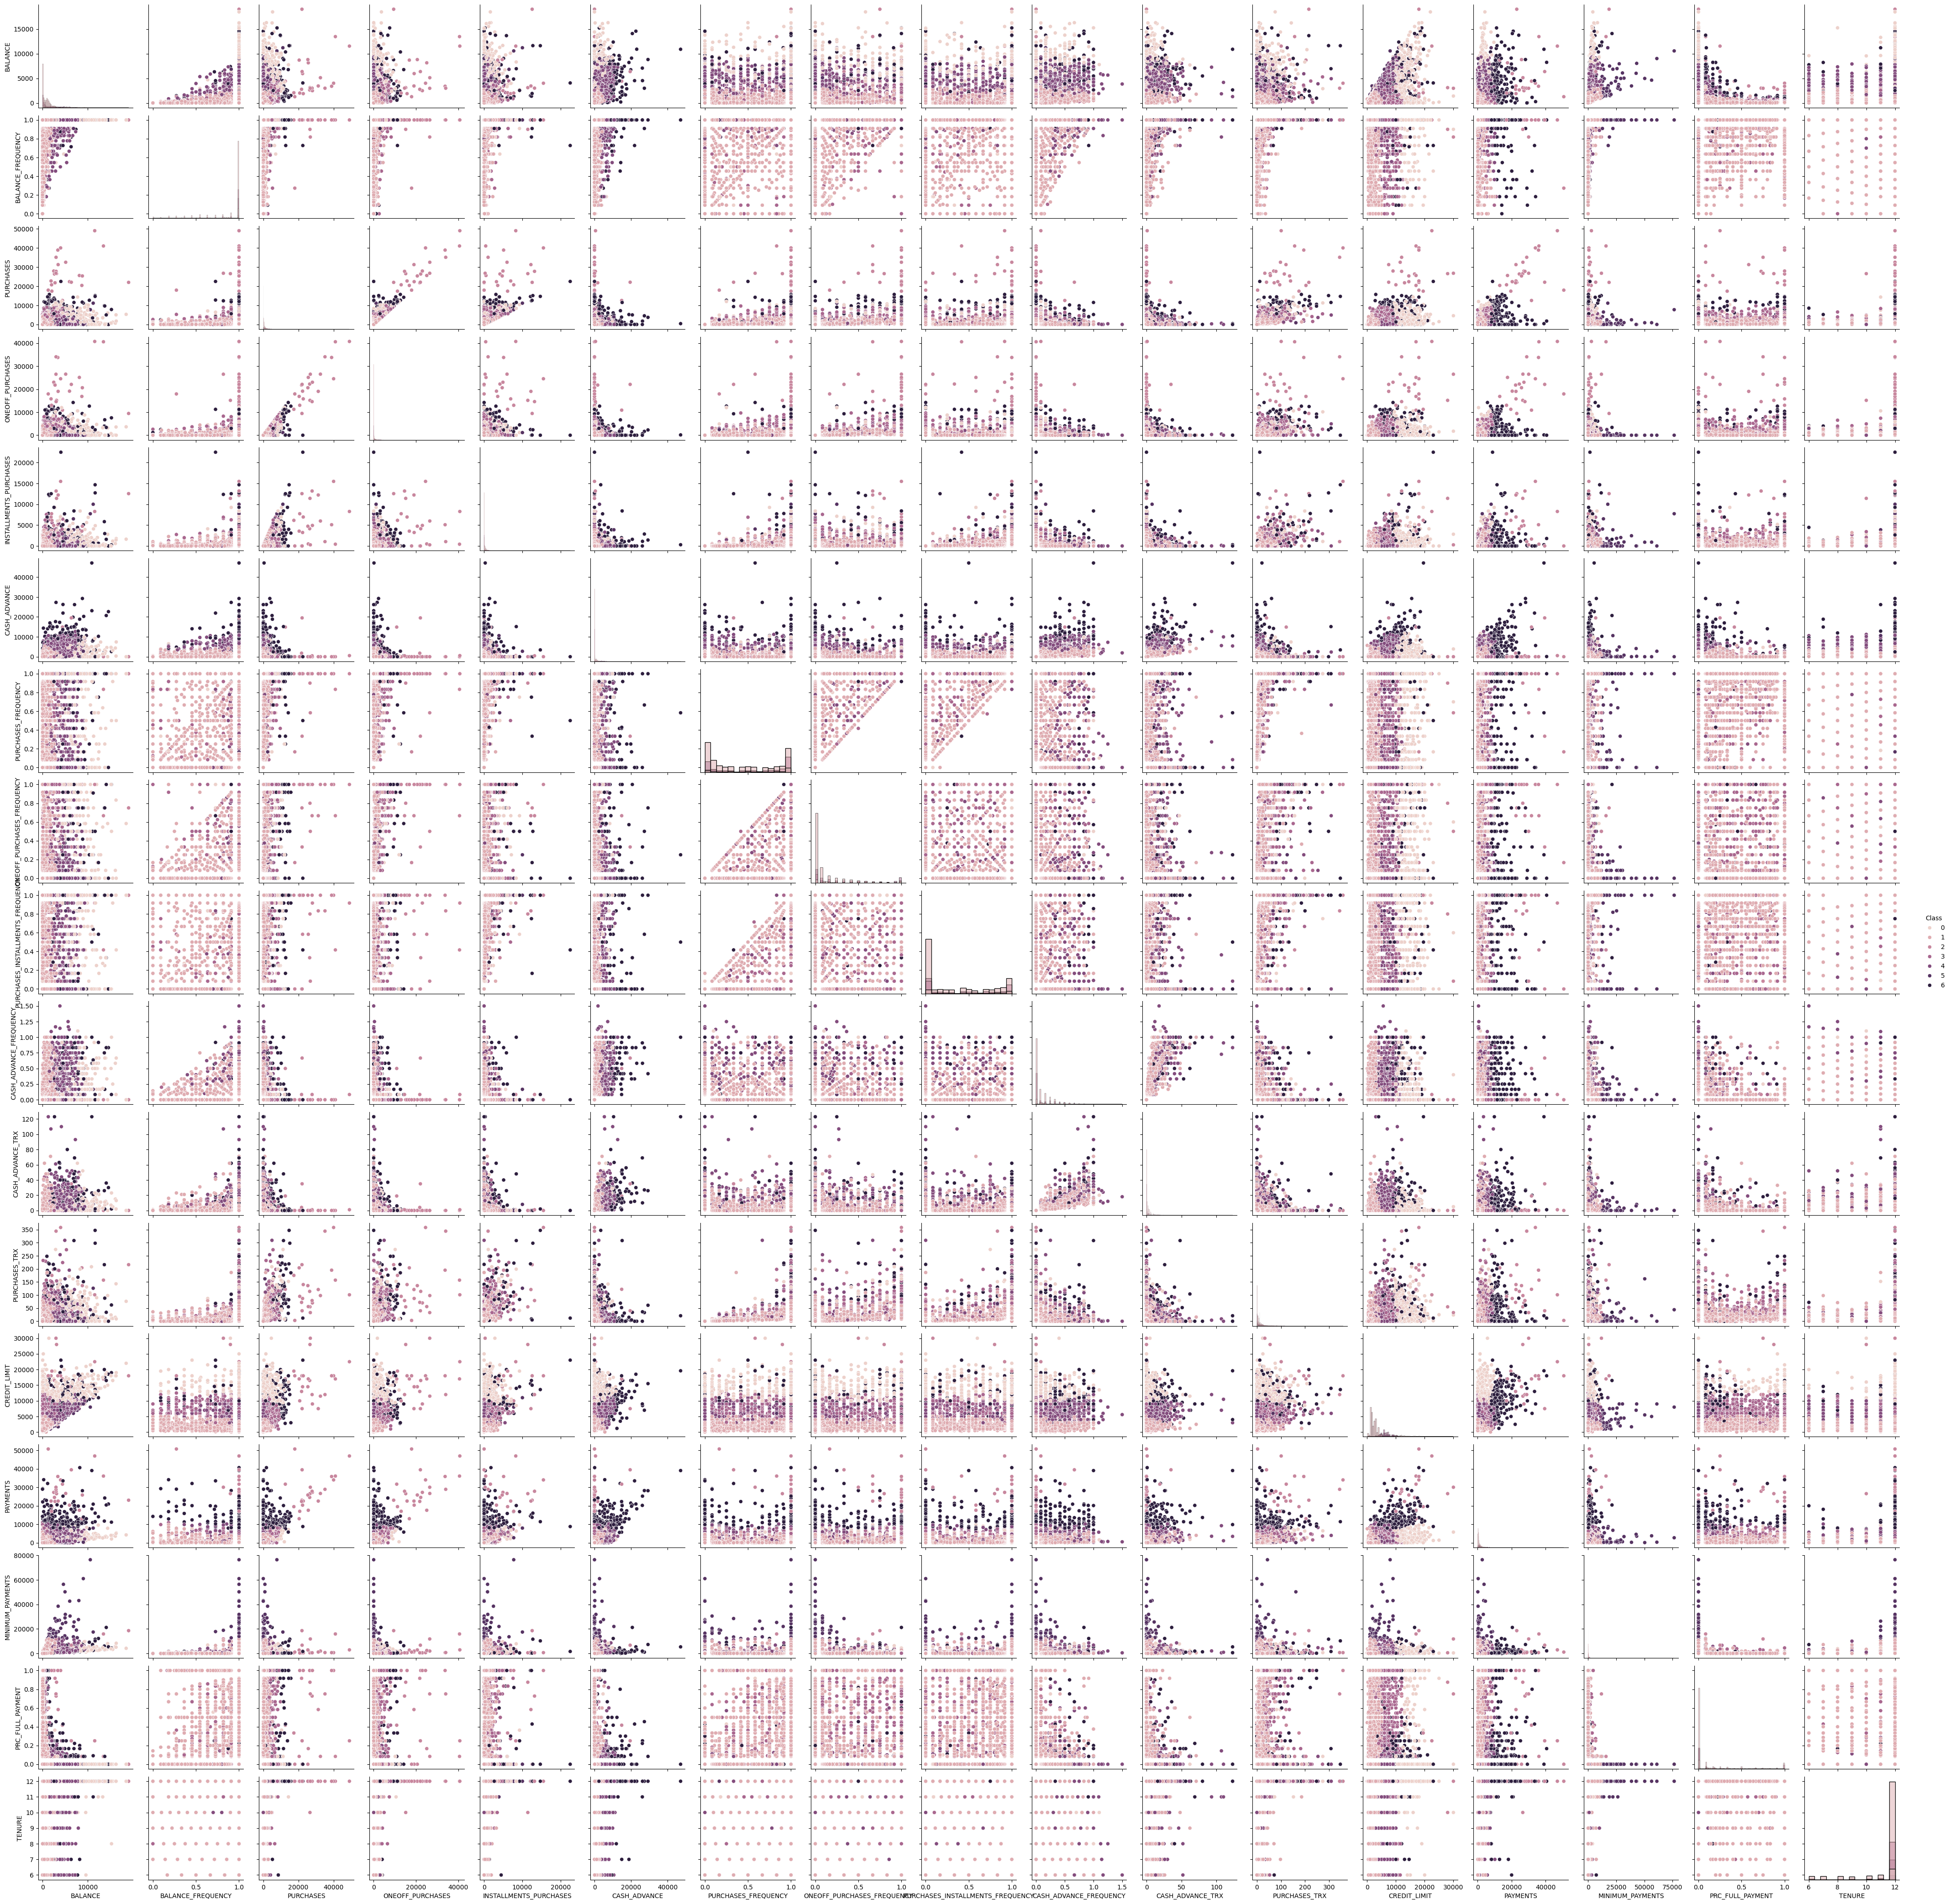

In [5]:
kmeans_temp = KMeans(n_clusters=n_clusters, random_state=42)
df_vis['Class'] = kmeans_temp.fit_predict(X_filled)  # Use K-Means labels for visualization
sns.pairplot(df_vis, hue='Class', diag_kind='hist')
plt.show()

#  K-Means Clustering


In [6]:

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_filled)
# If you have true labels, replace 'y' with the correct variable. Otherwise, remove Adjusted Rand Index.
kmeans_metrics = {
    'Model': 'K-Means',
    'Silhouette Score': silhouette_score(X_filled, kmeans_labels),
    # 'Adjusted Rand Index': adjusted_rand_score(y, kmeans_labels),  # Uncomment if y is defined
    'Davies-Bouldin Index': davies_bouldin_score(X_filled, kmeans_labels)
}
print("K-Means Metrics:", kmeans_metrics)

K-Means Metrics: {'Model': 'K-Means', 'Silhouette Score': 0.39023043157284687, 'Davies-Bouldin Index': 1.2257852321021159}


#  Gaussian Mixture Model (GMM)


In [7]:
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(X_filled)
gmm_metrics = {
    'Model': 'GMM',
    'Silhouette Score': silhouette_score(X_filled, gmm_labels),
  
    'Davies-Bouldin Index': davies_bouldin_score(X_filled, gmm_labels)
}
print("GMM Metrics:", gmm_metrics)

GMM Metrics: {'Model': 'GMM', 'Silhouette Score': -0.09769226275413395, 'Davies-Bouldin Index': 3.9965238757787462}


# Cluster Visualizaion

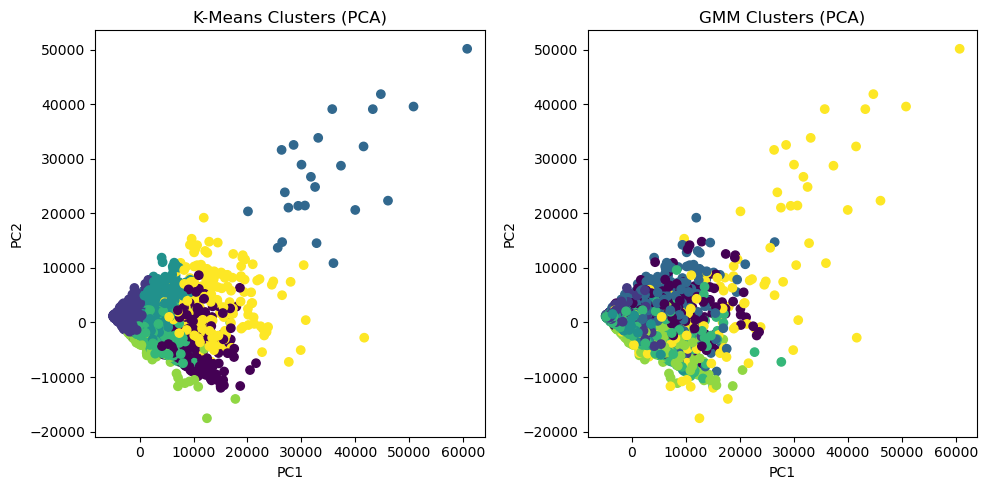

In [10]:
from sklearn.decomposition import PCA

# Visualize clusters using the first two principal components

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_filled)

plt.figure(figsize=(10, 5))

# K-Means clusters
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clusters (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# GMM clusters
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis')
plt.title('GMM Clusters (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()

# Results Comparison

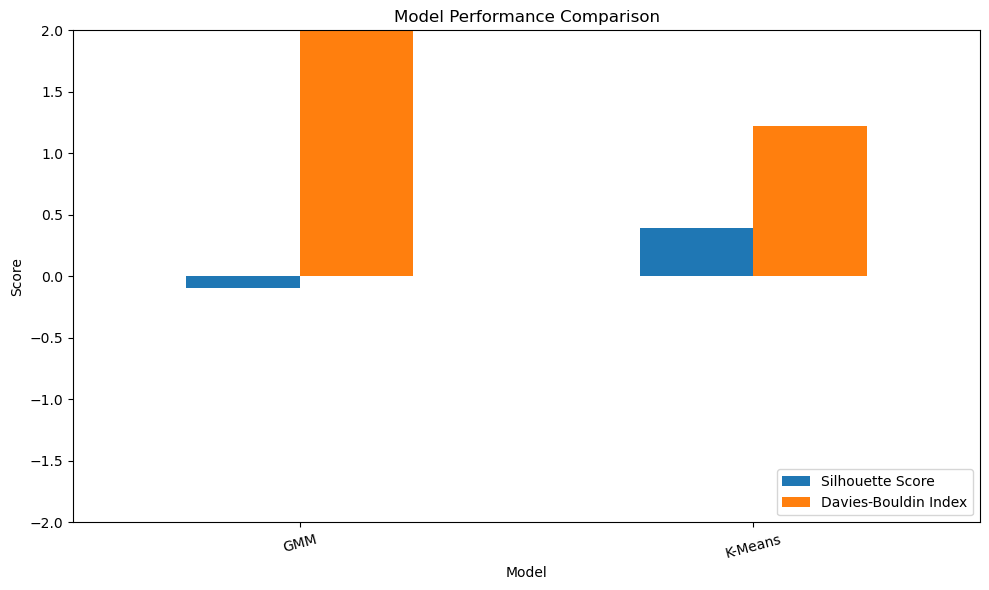

In [15]:
metrics_df = pd.DataFrame([gmm_metrics,kmeans_metrics])
metrics_df.set_index('Model', inplace=True)


metrics_df.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.ylim(-2, 2)
plt.xticks(rotation=15)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()